In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import math

## The Curse of dimensionality

* Given 1000 points in the unit square, what are the chances that the point is within .004 of the edge?
* Given 1000 points in a unit cube what are the  chances?
* Given 1000 points in a 1000 dimensional hypercube what are the chances?

In [2]:
import math, random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def dist(p):
    return math.sqrt(p[0]*p[0]+p[1]*p[1])

g1 = []
g2 = []
t = [[random.random()*2-1, random.random()*2-1] for i in range(1000)]
for i in range(len(t)):
    if dist(t[i]) < 0.2:
        g1.append(t[i])
    elif dist(t[i]) > .7 and dist(t[i]) < .98:
        g2.append(t[i])
        
    

Suppose you have a dataset that looks like this.  Where one class of points is in orange and the other is in blue.

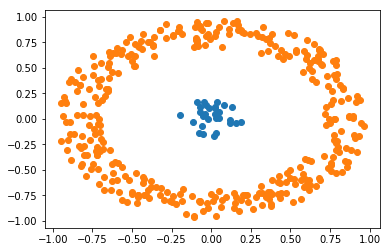

In [3]:
plt.scatter([p[0] for p in g1], [p[1] for p in g1] )
plt.scatter([p[0] for p in g2], [p[1] for p in g2] )


Lets look at it in 3D

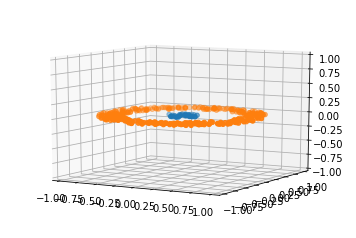

In [4]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1,1)
ax.scatter([p[0] for p in g1], [p[1] for p in g1], [0]*len(g1) )
ax.scatter([p[0] for p in g2], [p[1] for p in g2], [0]*len(g2) )
ax.view_init(10)


We can often find a way to add another dimension to the points to make them separable.  In this case lets add a third dimension that is equivalent to the distance from the origin to the point in the x-y plane.  visualizing with the third dimension added now makes it easy to separate the points.

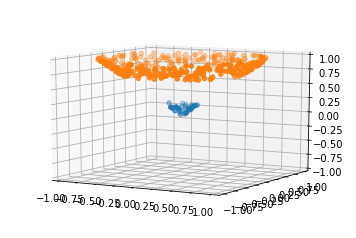

In [5]:
g1z = [dist(p) for p in g1]
g2z = [dist(p) for p in g2]
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1,1)
ax.scatter([p[0] for p in g1], [p[1] for p in g1], g1z )
ax.scatter([p[0] for p in g2], [p[1] for p in g2], g2z )

ax.view_init(10)
#    plt.draw()
#    plt.pause(.001)
    

Its very tempting to think that the solution is to add another dimension.  Or that more variables are always better.  But that is not the case for a couple of reasons.  Lets explore why not

1.  More dimensions means more 'extreme' points.  Where we define extreme to mean that the point is closer to a boundary in some dimension.

2.  More dimensions means that the points tend to be farther apart in the N-dimensional space.

### Counting extreme values

Lets count the number of points that are close to an edge in two dimensions

In [6]:
import random

pt = [(random.random(), random.random()) for i in range(1000)]
ct = 0
for p in pt:
  if p[0] < 0.004 or p[0] > .996 or p[1] < 0.004 or p[1]> .996:
    ct += 1
    continue
ct

11

Now lets do the same experiment in 3 dimensions

In [7]:
pt = [(random.random(), random.random(), random.random()) for i in range(1000)]
ct = 0
for p in pt:
  for d in p:
    if d < 0.004 or d > .996:
        ct += 1
        break
ct

26

this is going to get very challenging.  So its a good time to introduce some of the power of `numpy`

In [8]:
pt = np.random.rand(1000, 3)
ct = 0
for p in pt:
  for d in p:
    if d < 0.004 or d > .996:
        ct += 1
        break
ct

26

In [9]:
pt = np.random.rand(1000, 100)
ct = 0
for p in pt:
    for d in p:
        if d < 0.004 or d > .996:
            ct += 1
            break
ct        

542

In [10]:
pt = np.random.rand(1000,1000)

In [11]:
%%timeit
list(map(lambda x: any((y < .004 or y > .996 for y in x)) , pt)).count(True)

46.7 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%%timeit
[any((y< 0.004 or y > .996 for y in x)) for x in pt].count(True)

40.1 ms ± 4.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Calculating Distances

Calculate the distance between random pairs of points recall that we can calculate distance using the Pythagorean theorem $c = \sqrt{a^2+b^2}$ or

$d = \sqrt{(x_1 - x_2)^2 + (y_1-y_2)^2}$

This generalizes to as many dimensions as we have in our data.  This is another chance to use the power of numpy to do this with a single functional expression.

In [13]:
pt = np.random.rand(10000,25)
st = pt.copy()
np.random.shuffle(st)

In [14]:
np.square(pt-st)

array([[1.19122526e-04, 9.25560546e-02, 2.47039542e-01, ...,
        2.99816190e-01, 8.47008553e-04, 1.34452461e-01],
       [4.25422043e-01, 2.01302129e-01, 2.54515476e-01, ...,
        1.18264814e-01, 4.77825572e-01, 1.36689670e-01],
       [6.64037281e-02, 7.82588727e-02, 4.66494809e-01, ...,
        3.51097057e-02, 1.55197520e-03, 2.47379594e-02],
       ...,
       [3.61854943e-04, 2.75745863e-04, 1.26711084e-01, ...,
        1.15933238e-02, 2.08025353e-01, 5.70400468e-01],
       [2.85979509e-03, 1.84640890e-01, 2.13157893e-02, ...,
        2.50816221e-03, 3.67068803e-01, 2.27703242e-01],
       [2.45404404e-02, 3.92898930e-03, 7.34810146e-07, ...,
        2.57731711e-02, 7.35406873e-02, 8.08687750e-02]])

In [15]:
np.apply_along_axis(lambda x: math.sqrt(sum(x)),1,np.square(pt-st))

array([2.15934938, 2.15954823, 1.73831033, ..., 1.65070139, 1.8239934 ,
       1.59239182])

In [16]:
np.mean(np.apply_along_axis(lambda x: math.sqrt(sum(x)),1,np.square(pt-st)))

2.026095505372829

In [17]:
# axis=0 implies sum the columns
# axis=1 implies sum the rows

np.mean(np.sqrt(np.sum(np.square(pt-st),axis=1)))

2.026095505372829